In [ ]:
! pip install langgraph

In [ ]:
!pip install langsmith

In [ ]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.2.1
    Uninstalling langchain-core-1.2.1:
      Successfully uninstalled langchain-core-1.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-

In [ ]:
from google.colab import userdata
groq_api_key=userdata.get('GROQ_API')

In [ ]:
langsmith=userdata.get('LANGCHAIN_API')

In [ ]:
import os
os.environ['LANGCHAIN_API_KEY']=langsmith
os.environ['LANGCHAIN_TRACING_V2']='true'
os.environ['LANGCHAIN_PROJECT']='courselanggraph'

In [ ]:
from langchain_groq import ChatGroq
llm=ChatGroq(model='llama-3.1-8b-instant',groq_api_key=groq_api_key)

START BUILDING CHATBOT USING **LANGGRAPH**

In [ ]:
from typing import Annotated  #When new messages come, append them, don’t overwrite| Why needed? To make chat history grow automatically.
from typing_extensions import TypedDict   #What information will my chatbot remember and pass between steps
from langgraph.graph import StateGraph,START,END
# StateGraph= This is the flow controller.StateGraph = connects steps together| START and END – “Where does it begin & stop?”
from langgraph.graph.message import add_messages #When a node returns messages, add them to chat history

In [ ]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [ ]:
graph_builder #used to add nodes,connect nodes,compile

In [ ]:
def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

In [ ]:
graph_builder.add_node("chatbot",chatbot)

In [ ]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

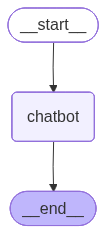

In [ ]:
graph=graph_builder.compile()
graph

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream(
        {"messages": [("user", user_input)]}
    ):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

User: hello
Assistant: Hello. Is there something I can help you with, or would you like to chat?
User: what is langgraph
Assistant: Langgraph is a relatively less-known concept but it seems you are referring to "Language Graph" or more specifically to "Dependency Graph" or "Dependency Structure Matrix" (DSM) or "Dependency Grammar" but more specifically the LangGraph is an implementation of a dependency structure matrix.

A Dependency Graph, also known as a Language Graph or Dependency Structure Matrix (DSM), is a method of representing the grammatical structure of a sentence as a graph. This graph consists of a set of nodes, each representing a word in the sentence, and a set of directed edges, each representing a grammatical dependency between two words.

A Dependency Structure Matrix (DSM) is a mathematical representation of the dependency graph. It is a square matrix where the rows and columns represent words in the sentence, and the entry at row i and column j indicates the depend